In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import time
import kagglehub

In [2]:
s_time = time.time()
path = './data/'
# Download latest version
data_path = kagglehub.dataset_download("kazanova/sentiment140")
data_name = 'training.1600000.processed.noemoticon.csv'
data_full_name = data_path + "/" + data_name
df = pd.read_csv(data_full_name, encoding='ISO-8859-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [3]:
pos_df = df[df['target'] == 4].loc[:,'text'].str.split()
neg_df = df[df['target'] == 0].loc[:,'text'].str.split()

In [4]:
pos_exp_df = pos_df.explode().str.lower()
neg_exp_df = neg_df.explode().str.lower()

In [5]:
pos_cnt_dict = pos_exp_df.value_counts().to_dict()
neg_cnt_dict = neg_exp_df.value_counts().to_dict()

In [6]:
for s_word in STOPWORDS:
    pos_cnt_dict.pop(s_word, None)
    neg_cnt_dict.pop(s_word, None)

e_time = time.time()
print(e_time - s_time)

11.880395889282227


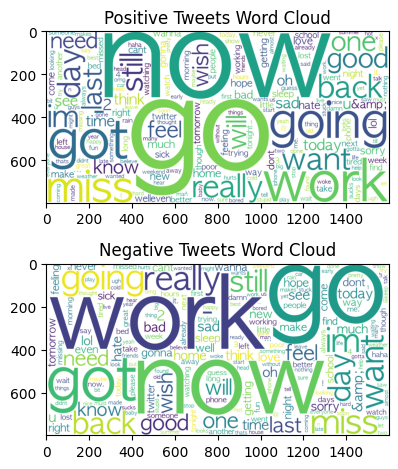

In [7]:
plt.subplot(211)
wc = WordCloud(
    font_path='AppleGothic',
    max_words=200,
    stopwords=STOPWORDS,
    height=800,
    width=1600,
    background_color='white'
    )
pos_wc_img = wc.generate_from_frequencies(pos_cnt_dict)
neg_wc_img = wc.generate_from_frequencies(neg_cnt_dict)
plt.imshow(pos_wc_img)
plt.title('Positive Tweets Word Cloud')
plt.subplot(212)
wc = WordCloud(
    font_path='AppleGothic',
    max_words=200,
    stopwords=STOPWORDS,
    height=800,
    width=1600,
    background_color='white'
    )
neg_wc_img = wc.generate_from_frequencies(neg_cnt_dict)
plt.imshow(neg_wc_img)
plt.title('Negative Tweets Word Cloud')
plt.tight_layout();